In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
path="/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv"
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
data = pd.read_csv(path)
data.head()
# from sklearn.linear_model import LogisticRegression
# l_r = LogisticRegression()
# X_train_afs, X_test_afs, y_train_afs,y_test_afs = train_test_split(data.drop("DEATH_EVENT",1),data.DEATH_EVENT,test_size=0.20,random_state=7)
# l_r.fit(X_train_afs,y_train_afs)
# l_r.score(X_test_afs,y_test_afs)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
data_oversample = data.drop(["DEATH_EVENT"],1)
X, y = oversample.fit_resample(data_oversample,data.DEATH_EVENT)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=7)
from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression()
l_r.fit(X_train,y_train)
l_r.score(X_test,y_test)

.75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.75

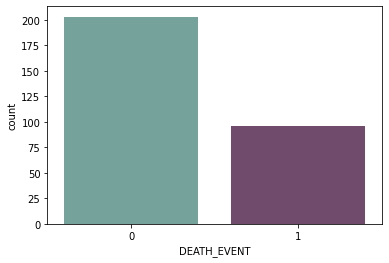

In [ ]:
columns= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= columns)
# sns.countplot(y, palette= columns)

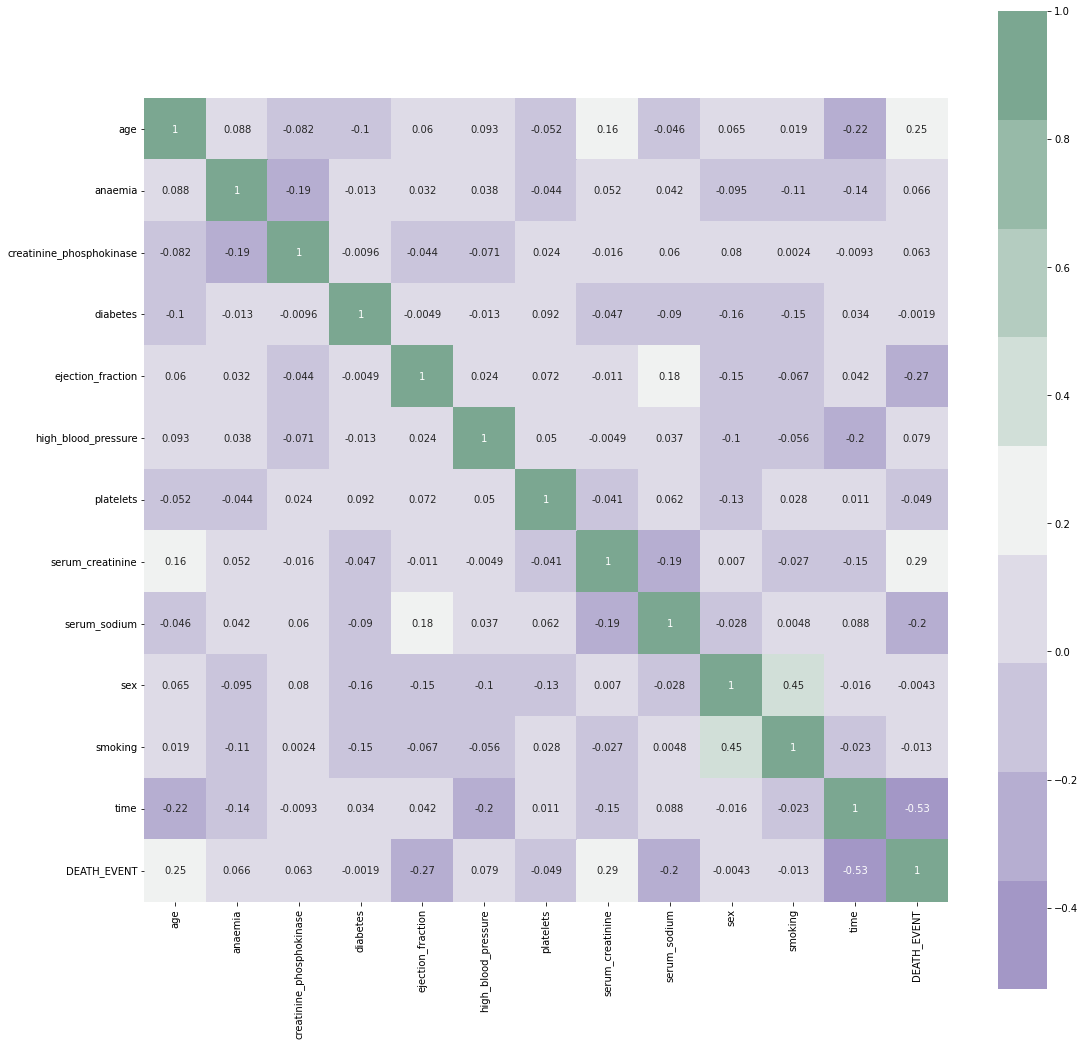

In [ ]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Text(0.5, 1.0, 'Distribution Of Age')

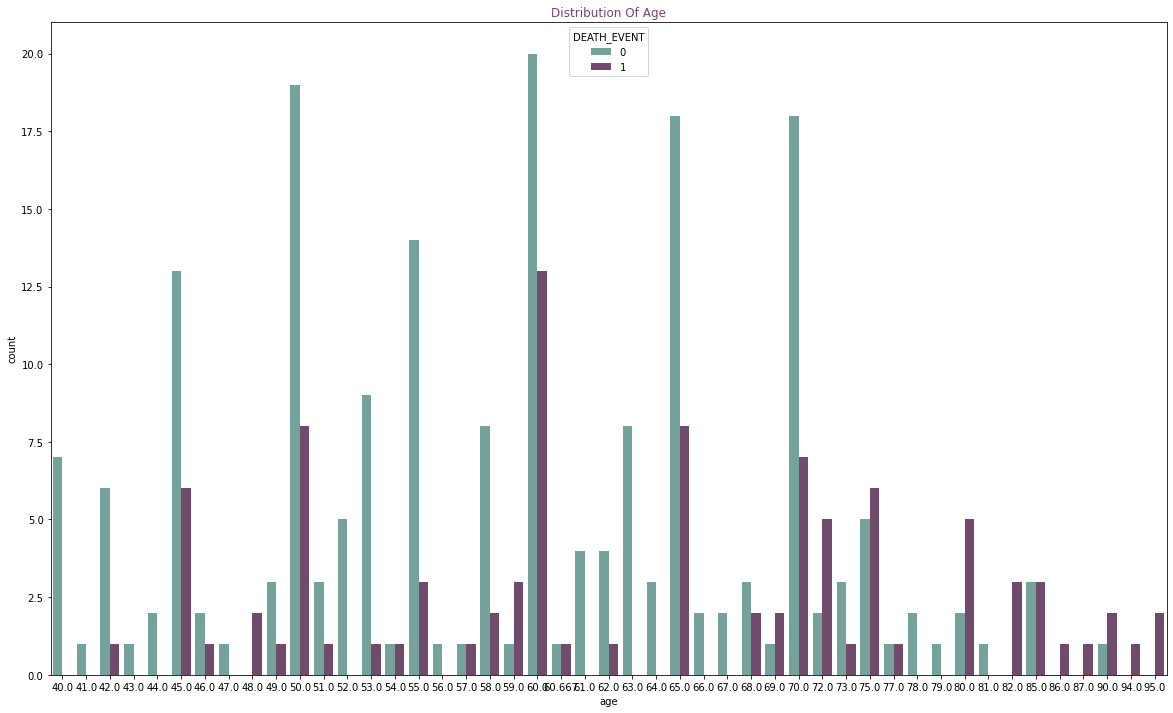

In [ ]:
 
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT",palette = columns)
days_of_week.set_title("Distribution Of Age", color="#774571")

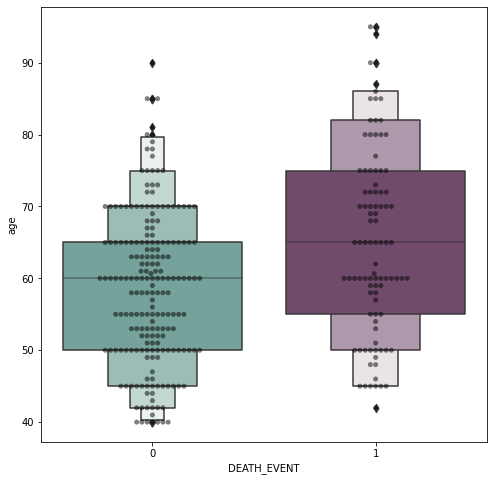

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


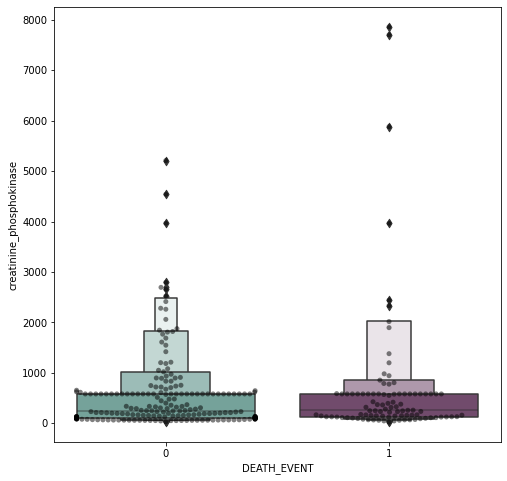

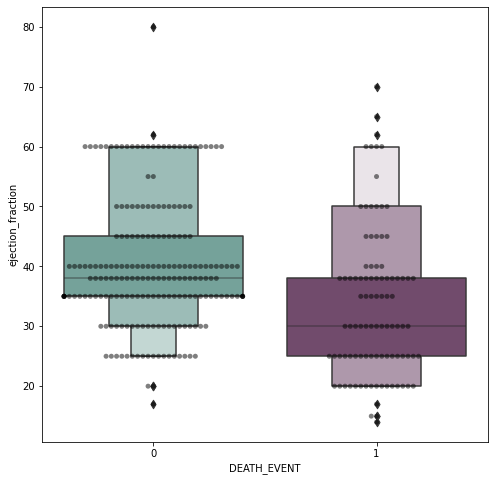

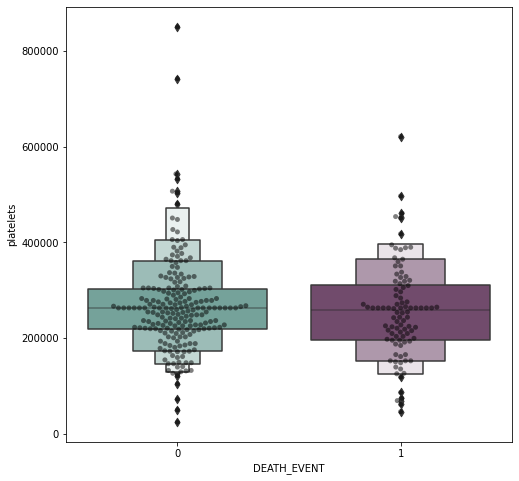

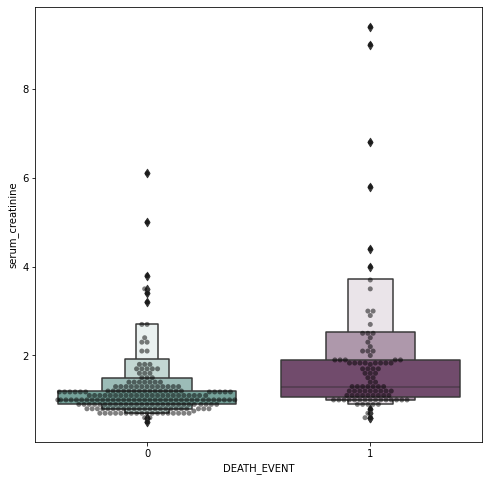

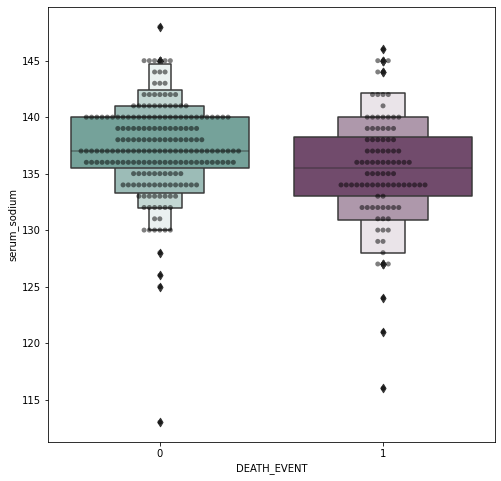

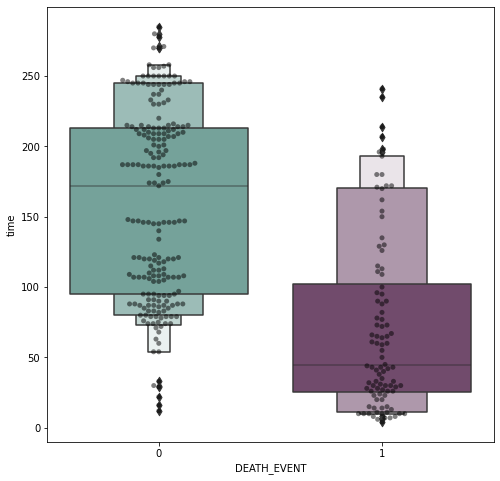

In [ ]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=columns)
    plt.show()

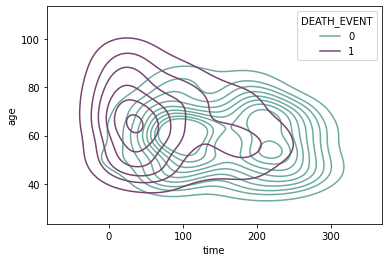

In [ ]:
sns.kdeplot(x=data["time"], y=data["age"], hue =data["DEATH_EVENT"], palette=columns)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]


In [ ]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


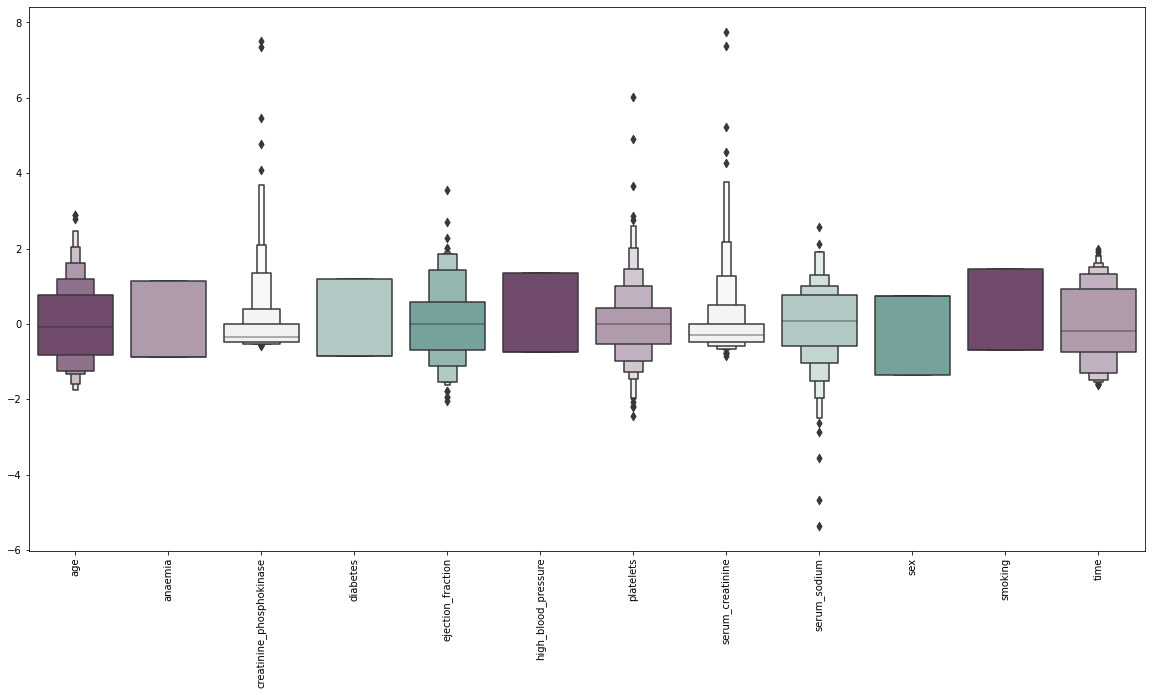

In [ ]:
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

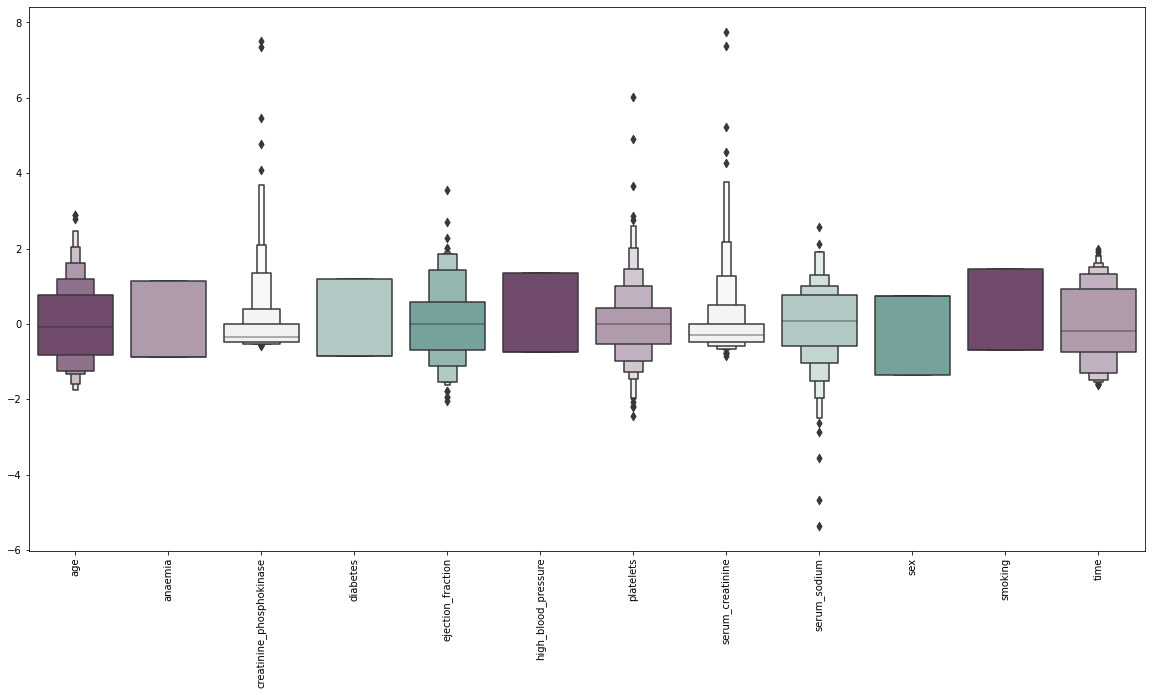

In [ ]:
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.40,random_state=7)

In [ ]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
244,-0.575491,-0.871105,0.000166,1.179830,-0.007077,-0.735688,6.574838e-03,0.393231,-0.595996,0.735688,-0.687682,1.067818
179,-0.491279,-0.871105,0.261350,-0.847579,0.162199,-0.735688,1.601995e-01,-0.671857,0.766064,0.735688,1.454161,0.216033
113,0.771889,1.147968,-0.453036,-0.847579,1.854958,-0.735688,8.975981e-01,-0.090900,0.085034,-1.359272,-0.687682,-0.519600
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
237,0.771889,-0.871105,-0.361157,-0.847579,-0.684180,-0.735688,-9.254150e-01,-0.187726,-1.050016,0.735688,-0.687682,1.029100
...,...,...,...,...,...,...,...,...,...,...,...,...
211,-0.912335,-0.871105,0.000166,-0.847579,2.024234,1.359272,-1.191698e+00,-0.575031,0.766064,0.735688,1.454161,0.796795
67,0.940312,1.147968,-0.487103,-0.847579,-1.107370,-0.735688,1.089913e-01,-0.381379,0.766064,0.735688,1.454161,-0.842246
25,1.614001,-0.871105,-0.447874,1.179830,-0.007077,-0.735688,-1.171215e+00,0.490057,1.674104,0.735688,1.454161,-1.384291
196,-1.333392,-0.871105,0.000166,1.179830,-0.007077,1.359272,7.535660e-09,-0.207091,0.085034,-1.359272,-0.687682,0.706454


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc_cl = DecisionTreeClassifier()
dc_cl.fit(X_train,y_train)
dc_cl.score(X_test,y_test)

0.8083333333333333

In [ ]:
from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression()
l_r.fit(X_train,y_train)
l_r.score(X_test,y_test)

0.8916666666666667

In [ ]:
data_input = data.drop("DEATH_EVENT",1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)

df_dummy=pd.get_dummies(data_input)
X_train_afs, X_test_afs, y_train_afs,y_test_afs = train_test_split(df_dummy,data.DEATH_EVENT,test_size=0.7)
model.fit(X_train_afs,y_train_afs)
model.score(X_test_afs,y_test_afs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


0.37754577020202007

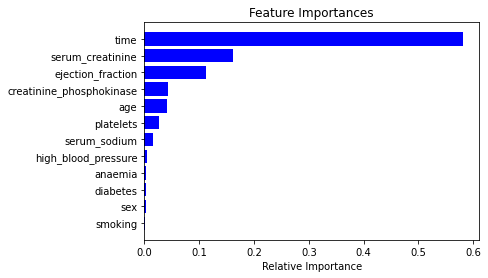

In [ ]:
features = data_input.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]  
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
data_set_after_feature_selection = data_input.drop(["high_blood_pressure","anaemia"],1)
X_train_afs, X_test_afs, y_train_afs,y_test_afs = train_test_split(data_set_after_feature_selection,data.DEATH_EVENT,test_size=0.20,random_state=7)

l_r = LogisticRegression()
l_r.fit(X_train_afs,y_train_afs)
l_r.score(X_test_afs,y_test_afs)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


0.85

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression()))
# estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
  # Voting Classifier with hard voting
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
# [[62.0,0,61,1,38,1,155000,1.1,143,1,1,270]]
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)


y_pred

Hard Voting Score  0
Soft Voting Score  0


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# kernel='rbf''linear''sigmoid''poly'
classifier = SVC(kernel='rbf', gamma='scale', random_state = 10)
# classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.20,random_state=7)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.9166666666666666

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r_f_c = RandomForestClassifier()
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.20,random_state=7)
r_f_c.fit(X_train,y_train)
r_f_c.score(X_test,y_test)

0.9166666666666666

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# d_t_r = DecisionTreeRegressor()
# X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.20,random_state=7)
# d_t_r.fit(X_train,y_train)
# d_t_r.score(X_test,y_test)

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)





Accuracy Of SVM For The Given Dataset :  0.9166666666666666


Predicted   0   1
Actual           
0          45   1
1           4  10


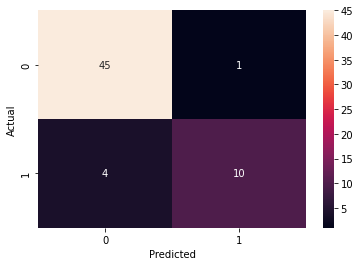

In [ ]:
data = {'y_Actual':    y_test,
        'y_Predicted': Y_pred
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix, annot=True)
plt.show()